### Importing packages

In [27]:
from utils.clustering import *
import pandas as pd

from utils.preprocessing import *
import matplotlib.pyplot as plt

from utils.preprocessing import *
from utils.fourier import *
from utils.dim_reduction import *
from utils.plotting import *
from utils.anomaly_detection import *

In [28]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 16,
    'axes.linewidth': 2,
    'axes.titlesize': 20,
    'axes.edgecolor': 'black',
    'axes.labelsize': 20,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'Arial',
    'legend.fontsize': 13,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})

### Importing dataset

In [29]:
df = pd.read_csv("datasets/sensors2/reducedDF.csv")
df

,PC1,PC2
0,-2.122777,0.277135
1,-2.233705,0.206017
2,-2.241807,0.142868
3,-2.105496,0.092320
4,-1.866048,0.051282
...,...,...
3981,-1.273627,-0.011049
3982,-1.166257,0.004097
3983,-1.286239,0.089486
3984,-1.705114,0.292003


Intializing a Isolation Forest class

In [30]:
ifo = iforest(df)

### Creating the model and predicting the anomalies

In [31]:
ifo.create_model()
labeled_data = ifo.predict_anomalies(df)
labeled_data

,PC1,PC2,classification,score
0,-2.122777,0.277135,True,0.208340
1,-2.233705,0.206017,True,0.207029
2,-2.241807,0.142868,True,0.211853
3,-2.105496,0.092320,True,0.221873
4,-1.866048,0.051282,True,0.233523
...,...,...,...,...
3981,-1.273627,-0.011049,True,0.243529
3982,-1.166257,0.004097,True,0.250930
3983,-1.286239,0.089486,True,0.246252
3984,-1.705114,0.292003,True,0.227105


### We can see in the classification column whether a point is a anomaly or not.

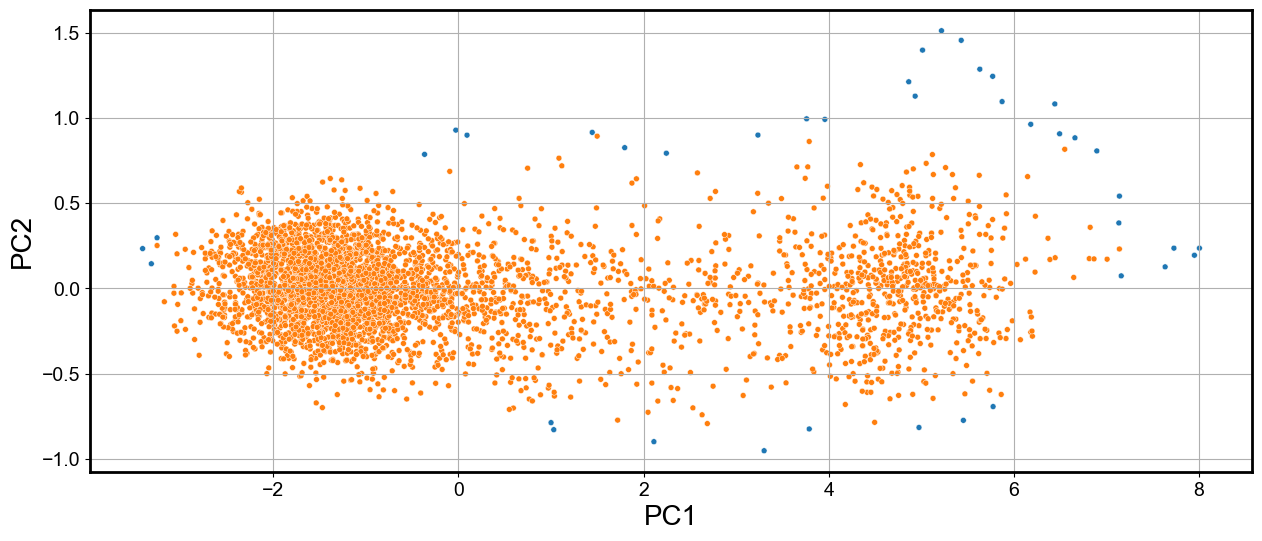

In [32]:
sns.scatterplot(data= labeled_data, x = "PC1", y = "PC2", hue = "classification", size = 1, legend=False)
plt.show()

### We also have the 'score' column, which shows that the lower, the more abnormal a point is.

In [33]:
fig = px.scatter(labeled_data, x = "PC1", y = "PC2", color="score")
fig.show()

### We can increase the accurary by tweeking the contamination hyperparameter, which represents the amount of contamination of the data set, i.e. the proportion of outliers in the data set. The default contamination is set to 0.01 (1%).

In [37]:
ifo.create_model(contamination=0.03)
labeled_data2 = ifo.predict_anomalies(df)

### With 3% of contamination we can see much more anomalies detected

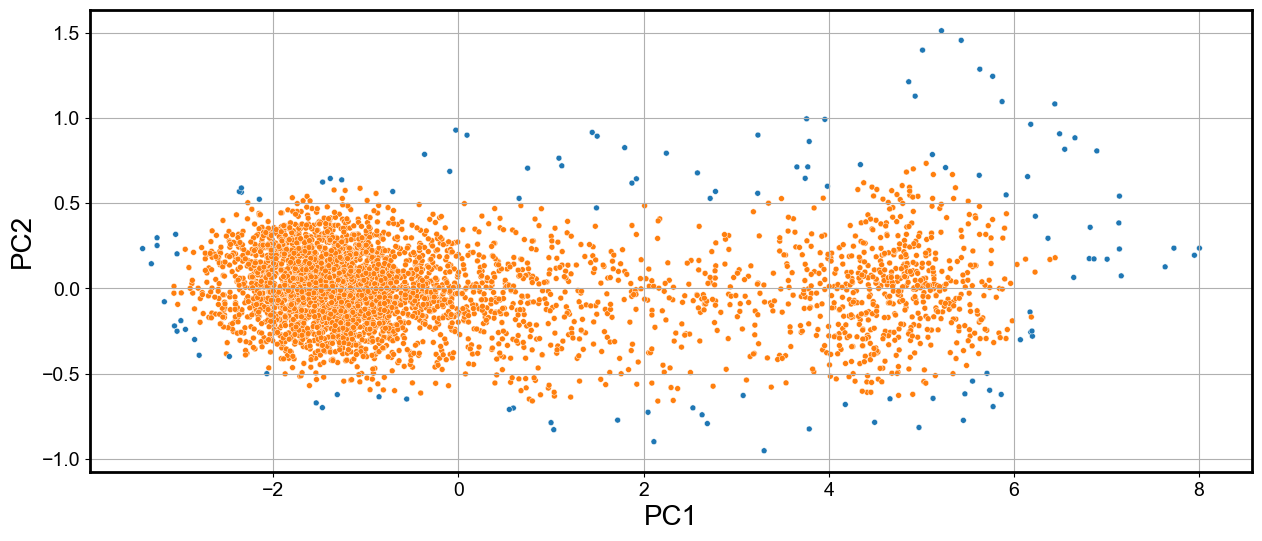

In [35]:
sns.scatterplot(data= labeled_data2, x = "PC1", y = "PC2", hue = "classification", size = 1, legend=False)
plt.show()

In [36]:

fig = px.scatter(labeled_data2, x = "PC1", y = "PC2", color="score")
fig.show()